In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_honorifics.csv")

In [2]:
questions = data.iloc[:,7:24]
#questions = questions.lower()
vocab = []
qcols = []
for question in range(1,18):
    qcols.append("Q"+str(question))
    stackedDf = questions.stack()
    vocab = stackedDf.unique()
    #vocab.append(data["Q"+str(question)].unique())

In [3]:
numRep = pd.DataFrame(columns=qcols)
dict = {}
for val in range(len(vocab)):
    dict[vocab[val]]=val
dict

{'Grandma': 0,
 'stone': 1,
 'Teacher': 2,
 'Teacup': 3,
 'Thought': 4,
 'Cat': 5,
 'Strawberry cake': 6,
 'car': 7,
 'Customer': 8,
 'Father': 9,
 'Employee': 10,
 'Murderer': 11,
 'Car': 12,
 'other': 13,
 'Listener': 14,
 "I don't know": 15,
 'grandma': 16,
 'Grandmother': 17,
 'Mother': 18,
 'father': 19,
 'Professor': 20,
 'Area': 21,
 'Hand': 22,
 'A': 23,
 'Other': 24,
 'Busan/Ilsan': 25,
 'Server': 26,
 'Baker': 27,
 'Cat owner': 28,
 'Company': 29,
 "Customer's burden": 30,
 'B': 31,
 'Thinker of Thought': 32}

In [4]:
df = pd.DataFrame()
for q in qcols:
    df[q] = questions[q].map(dict)
df = df.fillna(dict["I don\'t know"])

In [5]:
from sklearn.cluster import KMeans
def fitKmeans(numClusters,embeddings):
    kmeans =KMeans(n_clusters = numClusters)
    kmeans.fit(embeddings)
    return kmeans
kmeans = fitKmeans(10,df).labels_
df["kmeans"] = kmeans

In [6]:
def printClusterSet(df,num):
    for cluster in range(num):
        print("Cluster "+str(cluster))
        print(df[df["Kmeans "+str(num)]==cluster])
        print("\n\n")

In [7]:
import matplotlib.pyplot as plt
def doKmeans(df,kmeansToTest,showIntertias=True):
    # calculates inertias and kmeans clusters for each kmeans val to test
    inertias = []
    kmeansLabels = []
    for i in kmeansToTest:
        kmeans = fitKmeans(i,df)
        inertias.append(kmeans.inertia_)
        kmeansLabels.append(kmeans.labels_)

    # adds the cluster data to a df
    clusterDf = pd.DataFrame(df)
    for i in kmeansToTest:
        clusterDf['Kmeans '+str(i)] = kmeansLabels[i-kmeansToTest[0]]

    # shows graph of inertias for the user to decide where to make the cutoff
    plt.figure(figsize=(8,6))
    plt.scatter(kmeansToTest,inertias)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    
    if(showIntertias):
        plt.show()
    return clusterDf

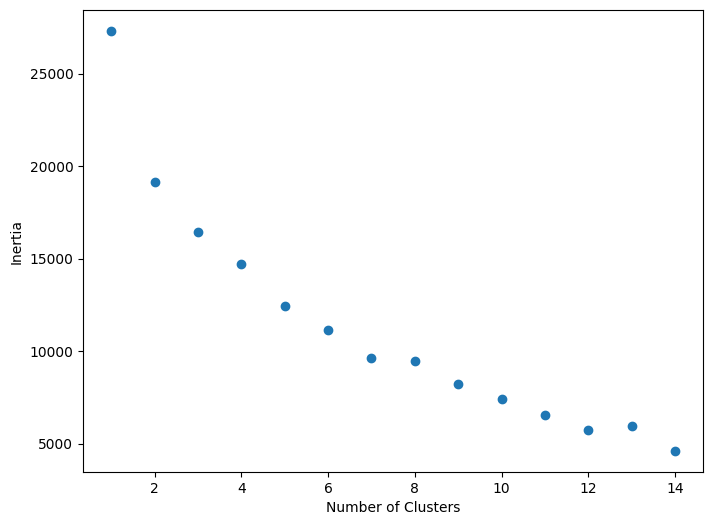

In [8]:
clusterDf = doKmeans(df,range(1,15))

In [9]:
clusterDf["Age"]=data["Age"]
clusterDf["Gender"]=data["Gender"]
printClusterSet(clusterDf,8)

Cluster 0
    Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Kmeans 7  Kmeans 8  \
0    0   1   2   3   1   2   4   3   5  5.0  ...         1         0   
1    4   1   2   3   1   2   4   3   5  5.0  ...         1         0   
4    0   1   2   3   1   2   4   3   5  5.0  ...         1         0   
10   4   1   2   3   1   2   4   3   5  5.0  ...         1         0   
11   4   1   2   3   1   2   4   3   9  5.0  ...         1         0   
19   0   1   2   3   1   2   4   3   5  5.0  ...         1         0   
21   4   1   2   3   1   2   4   3   5  5.0  ...         6         0   
23   4   1   2   3   1   2   4   3   5  5.0  ...         6         0   
25   0   1   2   3   1   2   4   3   5  5.0  ...         1         0   
27   0   1   2   3   1   2  15   3   5  5.0  ...         6         0   
31   0   1   2   3   1   2   4   3   5  5.0  ...         6         0   
35   4   1   2   3   1   2   4   3   5  5.0  ...         1         0   
36   4   1   2   3   1   2   4   3   5  5.0  ...      

In [10]:
def printClusterSetAge(df,num):
    clusterRows = []
    for cluster in range(num):
        print("Cluster "+str(cluster))
        rows = df[df["Kmeans "+str(num)]==cluster]["Age"]
        print("mean: "+ str(np.mean(rows)))
        print(rows)
        print("\n\n")
        clusterRows.append(rows)
    return clusterRows

rows2 = printClusterSetAge(clusterDf,2)
rows4 = printClusterSetAge(clusterDf,4)
rows8 = printClusterSetAge(clusterDf,8)

Cluster 0
mean: 26.897435897435898
0     21.0
1     23.0
3     64.0
4     62.0
6     30.0
8     20.0
9     22.0
10     NaN
11    24.0
14    20.0
15     NaN
18    21.0
19    50.0
20    47.0
21    20.0
22    21.0
23    24.0
25    22.0
27    21.0
28    19.0
29     NaN
30    22.0
31    47.0
32    22.0
34    25.0
35    23.0
36    22.0
38    24.0
39    28.0
40    23.0
41    28.0
44    22.0
46    27.0
48    24.0
49    23.0
50    24.0
54    21.0
56    21.0
59    20.0
60    20.0
61     NaN
64    23.0
66    29.0
Name: Age, dtype: float64



Cluster 1
mean: 27.666666666666668
2     63.0
5     47.0
7     21.0
12     NaN
13    20.0
16    25.0
17    23.0
24    49.0
26     NaN
33    23.0
37    25.0
42     NaN
43    23.0
45    24.0
47     NaN
51    24.0
52    26.0
53    21.0
55    23.0
57     NaN
58    23.0
62     NaN
63    18.0
65    20.0
Name: Age, dtype: float64



Cluster 0
mean: 28.0
21    20.0
23    24.0
27    21.0
31    47.0
Name: Age, dtype: float64



Cluster 1
mean: 25.545454545454547
0     

In [11]:
from scipy.stats import *
print(ttest_ind(list(rows2[0]),list(rows2[1]),nan_policy="omit"))
print(f_oneway(*rows4,nan_policy="omit"))
print(f_oneway(*rows8,nan_policy="omit"))

TtestResult(statistic=-0.23477639864145763, pvalue=0.8152541615082047, df=55.0)
F_onewayResult(statistic=0.5347187446761831, pvalue=0.6604980698274754)
F_onewayResult(statistic=0.8627797232647257, pvalue=0.5422270681035652)


In [12]:
df["Age"]=data["Age"]
def pValTest(df,colName,tukey=False):
    rows = []
    for val in df[colName].unique():
        print("val: "+str(val))
        rows.append(df[df[colName]==val]["Age"])
        print(np.mean(df[df[colName]==val]["Age"]))
        print("")
    print(f_oneway(*rows,nan_policy="omit"))
    print()
    if tukey:
        print(tukey_hsd(*rows))

for q in qcols:
    print(q)
    pValTest(df,q)

Q1
val: 0
28.61111111111111

val: 4
24.65

val: 15
24.0

F_onewayResult(statistic=0.809077233328069, pvalue=0.4505925630429597)

Q2
val: 1
26.673076923076923

val: 15
32.0

val: 14
nan

F_onewayResult(statistic=nan, pvalue=nan)

Q3
val: 2
27.196428571428573

val: 15
24.0

F_onewayResult(statistic=0.07595227766755085, pvalue=0.7838924147523991)

Q4
val: 3
26.274509803921568

val: 15
32.0

val: 14
47.0

F_onewayResult(statistic=2.2100330327824604, pvalue=0.11952433427857226)

Q5
val: 1
26.372093023255815

val: 16
29.923076923076923

val: 15
24.0

F_onewayResult(statistic=0.5137226575248717, pvalue=0.601158568451549)

Q6
val: 2
26.87037037037037

val: 18
36.0

val: 15
24.0

F_onewayResult(statistic=0.6487231490669769, pvalue=0.5267377882882158)

Q7
val: 4
25.564102564102566

val: 15
27.583333333333332

val: 14
53.333333333333336

val: 32
19.666666666666668

F_onewayResult(statistic=8.291681550476016, pvalue=0.00012868932909781148)

Q8
val: 3
26.295454545454547

val: 17
30.5

val: 15
24.0


/var/folders/32/14wzkv1d38q3fxdwkkhh_dcr0000gn/T/ipykernel_62620/2085192740.py:9: SmallSampleWarning: After omitting NaNs, one or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(f_oneway(*rows,nan_policy="omit"))


In [18]:
df[["Q16","Age"]]
d = data[["Q16","Age"]].dropna()
pValTest(d,"Q16",tukey=True)

val: Murderer
25.738095238095237

val: Mother
44.4

val: Listener
20.4

val: I don't know
32.0

val: Other
23.0

F_onewayResult(statistic=4.606301637481717, pvalue=0.0029334574030703015)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -18.662     0.003   -32.253    -5.071
 (0 - 2)      5.338     0.801    -8.253    18.929
 (0 - 3)     -6.262     0.840   -23.430    10.906
 (0 - 4)      2.738     0.996   -18.054    23.530
 (1 - 0)     18.662     0.003     5.071    32.253
 (1 - 2)     24.000     0.004     5.831    42.169
 (1 - 3)     12.400     0.461    -8.580    33.380
 (1 - 4)     21.400     0.103    -2.636    45.436
 (2 - 0)     -5.338     0.801   -18.929     8.253
 (2 - 1)    -24.000     0.004   -42.169    -5.831
 (2 - 3)    -11.600     0.528   -32.580     9.380
 (2 - 4)     -2.600     0.998   -26.636    21.436
 (3 - 0)      6.262     0.840   -10.906    23.430
 (3 - 1)    -12.400     0.461   -33.380     

In [19]:
print(data[["Q16","Age"]])

         Q16   Age
0   Murderer  21.0
1   Murderer  23.0
2     Mother  63.0
3     Mother  64.0
4   Murderer  62.0
..       ...   ...
62  Murderer   NaN
63  Listener  18.0
64  Listener  23.0
65  Listener  20.0
66  Murderer  29.0

[67 rows x 2 columns]
